In [1]:
import sys
sys.path.append('../')

import seaborn as sns
from data_model import Individual
from sys_utils import load_model

checkpoint_path = '../checkpoints_dev'

individuals = load_model(
        Individual, name=checkpoint_path + "/individuals.jsonl"
    )

In [ ]:
#query_to_wikidata/data/identifier_country.csv

In [22]:
import pandas as pd

In [595]:
individuals[0]

Individual(id=RawIndividual(wikidata_id='Q77297362', name='Jean Jacques Morgan', birthyear=1756, gender=['male'], raw_nationalities=[RawNationality(wikidata_id='Q142', name='France', location='Point(2.0 47.0)')], raw_birthcities=None, occupations=[Occupation(wikidata_id='Q1281618', name='sculptor', category=['artist'])]), impact_years=(1770, 1820), cultural_score=None, country=Country(name='France', code='fr'), wikipedia_pages=None, regions=['re_northwestern_europe', 're_western_europe', 're_france'], identifiers=None)

In [596]:
df_individuals = [
        {
            "wikidata_id": x.id.wikidata_id,
            "name": x.id.name,
            "year": x.id.birthyear,
            "impact_years":x.impact_years,
            "identifier_id": [y.wikidata_id for y in x.identifiers] if x.identifiers is not None else [],
            "identifier_name":[y.name for y in x.identifiers] if x.identifiers is not None else [],
            "region_code": x.regions if x is not None else [],
        }
        for x in individuals
    ]

df_individuals = pd.DataFrame(df_individuals)


In [600]:
df_individuals['year'] += 35
df_individuals['decade'] = df_individuals['year'].apply(lambda x : int(x/50)*50)
#df_individuals['decade'] = df_individuals['year'].apply(lambda x : int(x/50)*50)

In [601]:
identifiers_country = pd.read_csv('../../../query_to_wikidata/data/identifier_country.csv')
identifiers_country['identifier_id'] = identifiers_country['property'].apply(lambda x : x.split('/entity/')[1])
identifiers_country = identifiers_country[['countryLabel','identifier_id']].dropna()

filter_iden = pd.read_csv('top_identifiers.csv', index_col = [0])
filter_iden = filter_iden.drop('countryLabel', axis=1)

identifiers_country = pd.merge(identifiers_country, filter_iden, on = 'identifier_id')
identifiers_country = identifiers_country[['identifier_name', 'country_identifier']]
identifiers_country = identifiers_country.rename({'country_identifier':'countryLabel'}, axis=1)
identifiers_country =identifiers_country.drop_duplicates()

In [602]:
df_score = df_individuals.explode(['identifier_id', 'identifier_name'])
df_score = df_score[~df_score['identifier_id'].isna()]

In [603]:
df_score = pd.merge(df_score, identifiers_country, on = 'identifier_name')


In [604]:
test = df_score[df_score['identifier_name']=='NUKAT ID']

In [605]:
len(set(test.wikidata_id))

38374

In [606]:
top_db_country = df_score.groupby(['countryLabel', 'identifier_id', 'identifier_name'])['wikidata_id'].count().reset_index()
#top_db_country = top_db_country.sort_values(['countryLabel', 'wikidata_id'], ascending=(False, False))

In [607]:

top_db_country = top_db_country.groupby('countryLabel').head(1)
top_db_country = top_db_country.sort_values('wikidata_id', ascending=False).reset_index(drop=True)
top_db_country['country_identifier'] = top_db_country.apply(lambda x : x['identifier_name'] + ' (' + x['countryLabel'] + ')', axis=1)
top_db_country.to_csv('top_identifiers.csv')


In [608]:
#df_score_individuals_filter = df_score_individuals[df_score_individuals['']]

In [609]:
df_score_individuals = df_score.groupby(['countryLabel', 'wikidata_id', 'name'])['identifier_id'].count().rename('score').reset_index()
df_score_individuals = df_score_individuals.sort_values('score', ascending=False).reset_index(drop=True)

In [610]:
df_score_individuals[df_score_individuals['wikidata_id']=='Q1707636']

,countryLabel,wikidata_id,name,score
58841,National Library of Israel J9U ID (National Li...,Q1707636,Joseph Michel,1
245633,Nationale Thesaurus voor Auteurs ID (Nationale...,Q1707636,Joseph Michel,1
321627,GND ID (GND ID (Germany)),Q1707636,Joseph Michel,1
478206,Library of Congress authority ID (Library of C...,Q1707636,Joseph Michel,1
613035,IdRef ID (IdRef ID (France)),Q1707636,Joseph Michel,1


In [611]:
df_final = df_score[['wikidata_id', 'decade', 'region_code']].explode('region_code')
df_final = pd.merge(df_final, df_score_individuals, on = 'wikidata_id')
df_final = df_final.groupby(['countryLabel', 'region_code', 'decade'])['score'].sum().reset_index()

In [612]:
df_count = df_final.groupby(['countryLabel', 'region_code'])['score'].sum().reset_index()

In [613]:
#set(df_final.region_code)

In [614]:
#set(df_count.countryLabel)

In [615]:
countries = ['Japan', "People's Republic of China", 'France']

In [616]:
#identifiers_country[identifiers_country['countryLabel']=='Kingdom of the Netherlands']

In [617]:
#set(df_count.countryLabel)

In [618]:
set(df_final.region_code)

{' re_southern_china',
 're_arabian_peninsula',
 're_arabic_world',
 're_austria',
 're_balkans',
 're_belgium',
 're_british_islands',
 're_central_europe',
 're_chinese_world',
 're_denmark',
 're_eastern_europe',
 're_finland',
 're_france',
 're_german_world',
 're_germany',
 're_greece',
 're_greek_world',
 're_iceland',
 're_indian_world',
 're_ireland',
 're_italy',
 're_japan',
 're_korea',
 're_latin',
 're_low_countries',
 're_mediterreanean',
 're_muslim_world',
 're_netherlands',
 're_nordic_countries',
 're_north_china',
 're_north_france',
 're_north_india',
 're_north_italy',
 're_north_japan',
 're_northwestern_europe',
 're_norway',
 're_ottoman_turkey',
 're_ottoman_world',
 're_persian_world',
 're_portugal',
 're_slav_world',
 're_south_china',
 're_south_east_asia',
 're_south_france',
 're_south_india',
 're_south_italy',
 're_south_japan',
 're_southwestern_europe',
 're_spain',
 're_sweden',
 're_switzerland',
 're_united_kingdom',
 're_western_europe',
 're_yan

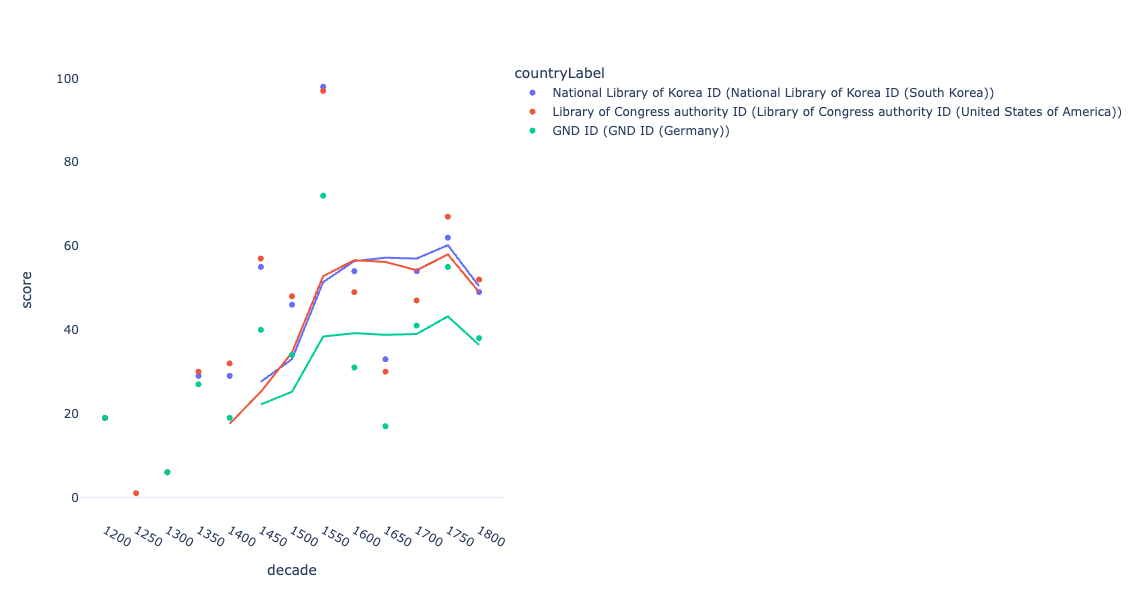

In [619]:
min_date = 1200
max_date = 1800
region = 're_korea'
log = 0

top_db = df_count[df_count['region_code']==region].sort_values('score', ascending=False)['countryLabel'][:3]
legend_order = list(top_db)


df_fig = df_final[(df_final['region_code']==region) & (df_final['decade']>=min_date)& (df_final['decade']<=max_date)]
df_fig = df_fig[df_fig['countryLabel'].isin(top_db)]
#df_fig['score'] = df_fig.groupby(['countryLabel'])['score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))



if log == 1:
    df_fig['score'] = np.log(df_fig['score'] + 1)
    

# create line plot
fig = px.scatter(df_fig, x='decade', y='score', color = 'countryLabel', 
              category_orders={'countryLabel': legend_order}, 
              height = 600, trendline="rolling", trendline_options=dict(window=5))



# add legend markers at last data points of each curve
last_points = df_fig.groupby('countryLabel').apply(lambda x: x.loc[x['decade'].idxmax()])
last_points = df_fig.groupby('countryLabel').sample(1)

"""
for id, row in last_points.iterrows():
    res = pd.DataFrame(row).T
    fig.add_trace(px.scatter(res, x='decade', y='score', text = 'countryLabel').data[0])
"""
# show plot



# set the template
fig.update_layout(template="plotly_white")
# remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
# set x-axis label interval
fig.update_xaxes(dtick=50)

# show plot
#fig.show()

fig.show()


In [204]:
import numpy as np

In [205]:
#df_score_individuals['score_binned'] = pd.qcut(df_score_individuals['identifier_id'], q = 100, labels = np.arange(1, 101)).astype(int)

In [542]:
res

,countryLabel,region_code,decade,score
National Library of Korea ID (South Korea),National Library of Korea ID (South Korea),re_korea,1800,70


In [207]:
import plotly.express as px

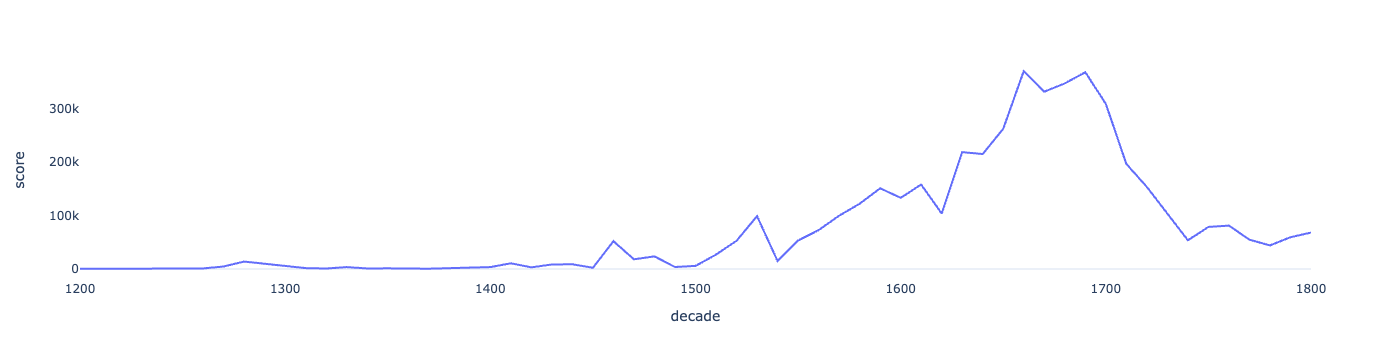

In [213]:
min_date = 1200
max_date = 1800
region = 're_low_countries'
log = 0

df_fig = df_final[(df_final['region_code']==region) & (df_final['decade']>=min_date)& (df_final['decade']<=max_date)]

if log == 1:
    df_fig['score'] = np.log(df_fig['score'] + 1)
    

# create line plot
fig = px.line(df_fig, x='decade', y='score')

# set the template
fig.update_layout(template="plotly_white")
# remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# show plot
fig.show()